# Regressão Linear

Determinando a relação linear entre umidade e temperatura utilizando dados da cidade de Szeged localizada na Hungria. Este é um dataset público do Kaggle (https://www.kaggle.com/budincsevity/szeged-weather)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('Weather_ Szeged_Hungary_2006_2016.csv')

In [3]:
dados.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Exibindo nomes das colunas

In [4]:
dados.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

As colunas Formatted Date, Summary e Daily Summary não são relevantes, podendo ser excluidas

In [5]:
dados = dados.drop(['Formatted Date','Summary','Daily Summary'],axis=1)

In [6]:
dados.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


Determinando os tipos de precipitação

In [7]:
dados['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

Para os casos em que o tipo de precipitação são nulos, temos um dia sem chuva. Desta forma iremos fazer uma análise para cada um dos três casos

In [8]:
dias_sol = dados[(dados['Precip Type'] != 'rain') & (dados['Precip Type'] != 'snow')]

In [9]:
dias_chuva = dados[(dados['Precip Type'] == 'rain')]

In [10]:
dias_neve = dados[(dados['Precip Type'] == 'snow')]

Graficando humidade em função da temperatura

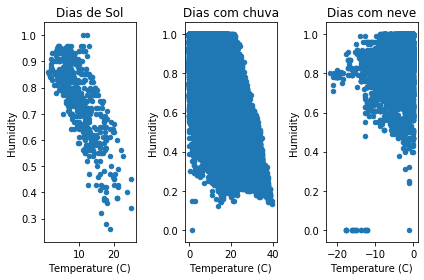

In [29]:
fig, ax = plt.subplots(1,3)
dias_sol.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[0],title='Dias de Sol');
dias_chuva.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[1],title='Dias com chuva');
dias_neve.plot(x='Temperature (C)',y='Humidity',kind='scatter',ax=ax[2],title='Dias com neve');
plt.tight_layout();

Dos gráficos observamos que os dias com sol apresentam uma relação mais próxima da linear. Nos dias com chuva podemos observar uma possível relação linear porém com uma dispersão muito maior. Já os dias com neve não é clara uma relação linear

# Dias de sol

In [30]:
dias_sol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 52672 to 95588
Data columns (total 9 columns):
Precip Type                 0 non-null object
Temperature (C)             517 non-null float64
Apparent Temperature (C)    517 non-null float64
Humidity                    517 non-null float64
Wind Speed (km/h)           517 non-null float64
Wind Bearing (degrees)      517 non-null float64
Visibility (km)             517 non-null float64
Loud Cover                  517 non-null float64
Pressure (millibars)        517 non-null float64
dtypes: float64(8), object(1)
memory usage: 40.4+ KB


In [31]:
dias_sol.isna().sum()

Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

Armazenando temperatura e umidade nas variáveis X e Y

In [41]:
X = dias_sol['Temperature (C)'].values.reshape(-1, 1)
Y = dias_sol['Humidity'].values.reshape(-1, 1)

Separando valores em amostras de treino e teste

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.30, shuffle=True, random_state=0)

In [44]:
X_treino.size

361

In [45]:
X_teste.size

156

Criando modelo de regressão linear

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
modelo = LinearRegression()

In [48]:
modelo.fit(X_treino,Y_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
Y_previsto = modelo.predict(X_teste)

Graficando valores reais e previstos

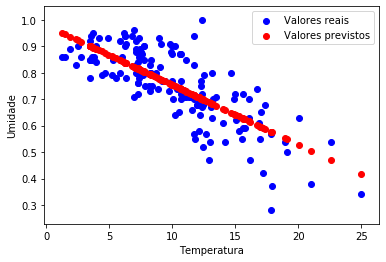

In [52]:
plt.scatter(X_teste,Y_teste,color='blue',label='Valores reais')
plt.scatter(X_teste,Y_previsto,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

Analisando erros da previsão

In [57]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [59]:
MAE_sol = mean_absolute_error(Y_teste,Y_previsto)
RMSE_sol = np.sqrt(mean_squared_error(Y_teste,Y_previsto))
R2_sol = r2_score(Y_teste,Y_previsto)

In [60]:
print('MAE = {:0.4f}'.format(MAE_sol))
print('RMSE = {:0.4f}'.format(RMSE_sol))
print('R2 = {:0.4f}'.format(R2_sol))

MAE = 0.0698
RMSE = 0.0891
R2 = 0.5928


# Dias de chuva

In [61]:
dias_chuva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85224 entries, 0 to 96452
Data columns (total 9 columns):
Precip Type                 85224 non-null object
Temperature (C)             85224 non-null float64
Apparent Temperature (C)    85224 non-null float64
Humidity                    85224 non-null float64
Wind Speed (km/h)           85224 non-null float64
Wind Bearing (degrees)      85224 non-null float64
Visibility (km)             85224 non-null float64
Loud Cover                  85224 non-null float64
Pressure (millibars)        85224 non-null float64
dtypes: float64(8), object(1)
memory usage: 6.5+ MB


In [62]:
dias_chuva.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [63]:
X_chuva = dias_chuva['Temperature (C)'].values.reshape(-1, 1)
Y_chuva = dias_chuva['Humidity'].values.reshape(-1, 1)

In [64]:
X_treino_chuva, X_teste_chuva, Y_treino_chuva, Y_teste_chuva = train_test_split(X_chuva, Y_chuva, test_size=0.30, shuffle=True, random_state=0)

In [65]:
X_treino_chuva.size

59656

In [66]:
X_teste_chuva.size

25568

In [83]:
modelo2 = LinearRegression()

In [84]:
modelo2.fit(X_treino_chuva,Y_treino_chuva)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
Y_previsto_chuva = modelo2.predict(X_teste_chuva)

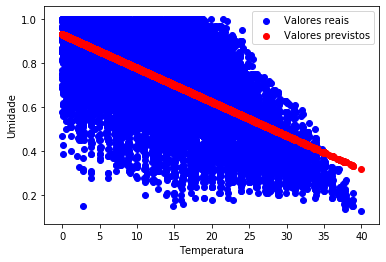

In [86]:
plt.scatter(X_teste_chuva,Y_teste_chuva,color='blue',label='Valores reais')
plt.scatter(X_teste_chuva,Y_previsto_chuva,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [87]:
MAE_chuva = mean_absolute_error(Y_teste_chuva,Y_previsto_chuva)
RMSE_chuva = np.sqrt(mean_squared_error(Y_teste_chuva,Y_previsto_chuva))
R2_chuva = r2_score(Y_teste_chuva,Y_previsto_chuva)

In [88]:
print('MAE = {:0.4f}'.format(MAE_chuva))
print('RMSE = {:0.4f}'.format(RMSE_chuva))
print('R2 = {:0.4f}'.format(R2_chuva))

MAE = 0.1211
RMSE = 0.1506
R2 = 0.4211


# Dias com neve

In [89]:
dias_neve.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10712 entries, 1562 to 93506
Data columns (total 9 columns):
Precip Type                 10712 non-null object
Temperature (C)             10712 non-null float64
Apparent Temperature (C)    10712 non-null float64
Humidity                    10712 non-null float64
Wind Speed (km/h)           10712 non-null float64
Wind Bearing (degrees)      10712 non-null float64
Visibility (km)             10712 non-null float64
Loud Cover                  10712 non-null float64
Pressure (millibars)        10712 non-null float64
dtypes: float64(8), object(1)
memory usage: 836.9+ KB


In [74]:
dias_neve.isna().sum()

Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [75]:
X_neve = dias_neve['Temperature (C)'].values.reshape(-1, 1)
Y_neve = dias_neve['Humidity'].values.reshape(-1, 1)

In [76]:
X_treino_neve, X_teste_neve, Y_treino_neve, Y_teste_neve = train_test_split(X_neve, Y_neve, test_size=0.30, shuffle=True, random_state=0)

In [77]:
X_treino_neve.size

7498

In [78]:
X_teste_neve.size

3214

In [90]:
modelo3 = LinearRegression()

In [91]:
modelo3.fit(X_treino_neve,Y_treino_neve)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
Y_previsto_neve = modelo3.predict(X_teste_neve)

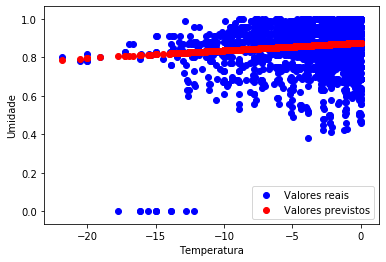

In [93]:
plt.scatter(X_teste_neve,Y_teste_neve,color='blue',label='Valores reais')
plt.scatter(X_teste_neve,Y_previsto_neve,color='red',label='Valores previstos')
plt.xlabel('Temperatura')
plt.ylabel('Umidade')
plt.legend(loc='best')

In [94]:
MAE_neve = mean_absolute_error(Y_teste_neve,Y_previsto_neve)
RMSE_neve = np.sqrt(mean_squared_error(Y_teste_neve,Y_previsto_neve))
R2_neve = r2_score(Y_teste_neve,Y_previsto_neve)

In [95]:
print('MAE = {:0.4f}'.format(MAE_neve))
print('RMSE = {:0.4f}'.format(RMSE_neve))
print('R2 = {:0.4f}'.format(R2_neve))

MAE = 0.0824
RMSE = 0.1130
R2 = 0.0217
